In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

## Data Preprocessing

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [4]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Model Training

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the model
model.fit(train_images, train_labels, epochs=50, batch_size=64, validation_split=0.2)


Epoch 1/50
750/750 [==============================] - 15s 6ms/step - loss: 0.2181 - accuracy: 0.9336 - val_loss: 0.0583 - val_accuracy: 0.9828
Epoch 2/50
750/750 [==============================] - 4s 5ms/step - loss: 0.0548 - accuracy: 0.9827 - val_loss: 0.0496 - val_accuracy: 0.9868
Epoch 3/50
750/750 [==============================] - 3s 5ms/step - loss: 0.0395 - accuracy: 0.9872 - val_loss: 0.0511 - val_accuracy: 0.9845
Epoch 4/50
750/750 [==============================] - 4s 6ms/step - loss: 0.0295 - accuracy: 0.9907 - val_loss: 0.0469 - val_accuracy: 0.9868
Epoch 5/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0242 - accuracy: 0.9924 - val_loss: 0.0463 - val_accuracy: 0.9871
Epoch 6/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0198 - accuracy: 0.9934 - val_loss: 0.0386 - val_accuracy: 0.9898
Epoch 7/50
750/750 [==============================] - 4s 6ms/step - loss: 0.0158 - accuracy: 0.9947 - val_loss: 0.0400 - val_accuracy: 0.9887
Epoch

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

## Metrics

In [9]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 3ms/step


In [10]:
true_labels = np.argmax(test_labels, axis=1)

In [11]:
classification_rep = classification_report(true_labels, predicted_labels)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      0.99      0.99      1135
           2       0.99      1.00      1.00      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
weighted_precision = precision_score(true_labels, predicted_labels, average='weighted')
weighted_recall = recall_score(true_labels, predicted_labels, average='weighted')
weighted_f1 = f1_score(true_labels, predicted_labels, average='weighted')

313/313 [==============================] - 1s 3ms/step - loss: 0.0683 - accuracy: 0.9909


In [13]:
print("Test accuracy:", test_acc)
print("Precision:", weighted_precision)
print("Recall:", weighted_recall)
print("F1 Score:", weighted_f1)

Test accuracy: 0.9908999800682068
Precision: 0.9909452705523248
Recall: 0.9909
F1 Score: 0.9908843853707602


In [14]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)

In [15]:
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


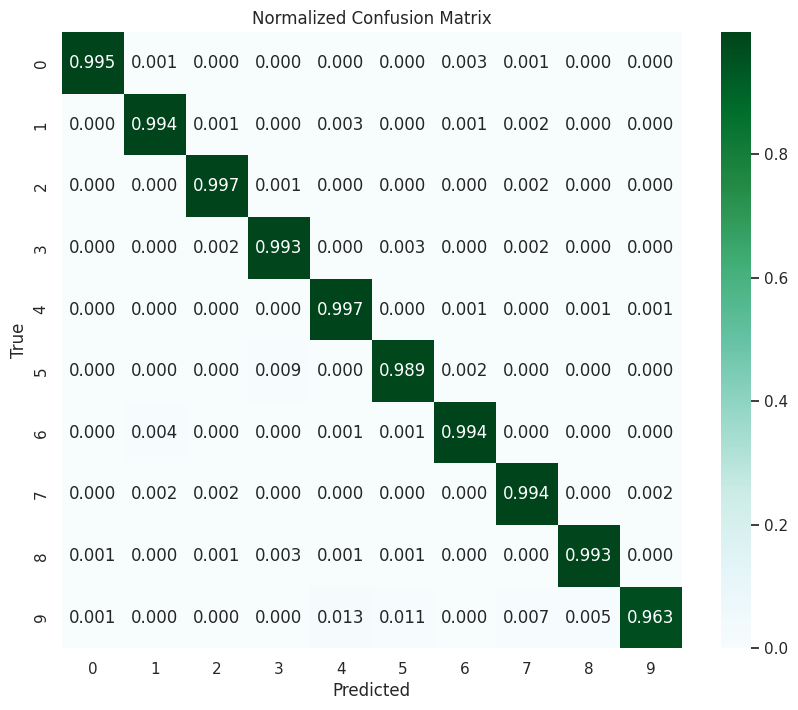

In [16]:
labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
plt.figure(figsize=(10, 8))
sns.set(font_scale=1)

sns.heatmap(conf_matrix, annot=True, fmt=".3f", cmap="BuGn", xticklabels=labels, yticklabels=labels)
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Testing

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
input_image_path = '/content/drive/MyDrive/PBL project/AIPBLDIGITS/8.jpg'

In [49]:
input_image = load_img(input_image_path, color_mode="grayscale", target_size=(28, 28))
input_image = img_to_array(input_image)
input_image = input_image / 255.0
input_image = input_image.reshape(1, 28, 28, 1)

In [50]:
predictions = model.predict(input_image)

1/1 [==============================] - 0s 18ms/step


In [51]:
predicted_label = np.argmax(predictions)
confidence = np.max(predictions)

In [52]:
image = Image.open(input_image_path)
image


In [53]:
print(f"Predicted Label: {predicted_label}")
print(f"Confidence: {confidence:.2f}")

Predicted Label: 8
Confidence: 1.00
